### Imports

In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Generate data


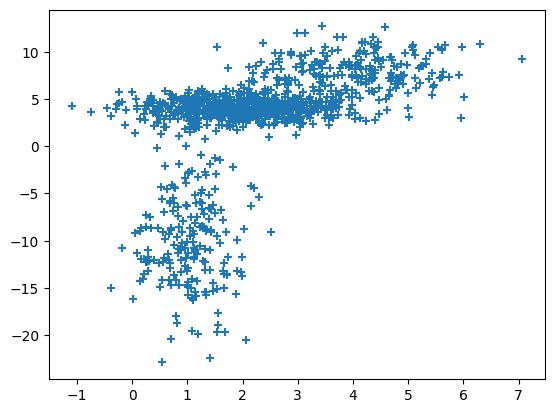

In [257]:
N = 1000
X = np.zeros((N, 2))
mean = np.array([[1, 2, 4], [-10, 4, 8]])
sigma = np.array([[0.5, 1, 1], [5, 1, 2]])

for i in range(N) :
    omega = np.random.rand(1)
    if (omega <= 0.2) :
        X[i, 0] = np.random.normal(mean[0, 0], sigma[0, 0])
        X[i, 1] = np.random.normal(mean[1, 0], sigma[1, 0])
    if (omega > 0.2 and omega <= 0.8) :
        X[i, 0] = np.random.normal(mean[0, 1], sigma[0, 1])
        X[i, 1] = np.random.normal(mean[1, 1], sigma[1, 1])
    if (omega > 0.8) :
        X[i, 0] = np.random.normal(mean[0, 2], sigma[0, 2])
        X[i, 1] = np.random.normal(mean[1, 2], sigma[1, 2])

plt.figure()
plt.scatter(X[:, 0], X[:, 1], marker="+")
plt.show()

# K-means algorithm

## The algorithm

We assume that the number $K$ of classes to form given. We look for a partition of the dataset $\{x_1, ... x_N\}$ into $k$ groups.

The $k$-means algorithm can be summarized as follows.

**Initialization :**
Associate randomly each points $x_i$ to one of the $K$ groups $S_1^0, ..., S_K^0$.

**Recursion :**
Given a partition $S_1^n, ..., S_K^n$, we define a new partition $S_1^{n+1}, ..., S_K^{n+1}$. To do so, we proceed as follows
1. For any $1\leq k\leq K$, compute the mean $\overline{x}_k^n$ of elements in $S_k^n$.
2. For any $1\leq i\leq N$, identify the element in $\overline{x}_1^n, ..., \overline{x}_K^n$ that is the closest to $x_i$. We denote by $\sigma(i)$ the index of the closest mean element. 
3. For any $1\leq k\leq K$, define $S_k^{n+1}$ as
$$
S_k^{n+1} = \{ x_i \ \text{s.t.} \ \sigma(i) = k\}. 
$$

**Stopping criterion :**
We stop the algorithm when $S_k^{n+1} = S_k^n$ for any $k$. 

## Convergence of the algorithm

The $k$-mean algorithm minimizes the **within-cluster Sum of Squares** defined by
$$
WCSS = \sum_{1\leq k \leq K} \sum_{i \in S_k} \|x_i -\overline{x}_k \|^2.
$$

This is

Indeed, for any $n\geq 0$, let us denote $WCSS^n$ the wihtin-cluster Sum of Squares of the partition $S_1^n, ..., S_K^n$. Then, it can be shown that 
$$
WCSS^{n+1}\leq WCSS^n.
$$


## Some remarks
Let us mention two limitations of the $k$-mean algorithm:
1. It assume that the number of cluster to be form is known.
2. It depends heavily on the initial partitions of the dataset. 

Regarding 1. Note also that the algorithm may return a partition of the dataset into $K'\leq K$ classes. Indeed, in the course of the recursion, empty classes are removed.

Regarding 2. Consequently to this fact, the outcome of the algorithm is generally not optimal. To improve the results, an improved strategy consist in a. running the algorithm for various initial partitions, and b. select the final configuration with the smallest WCSS.


In [258]:
def compute_mean(X, K, label) :
    mean = np.zeros((K, np.shape(X)[1]))
    for i in range(np.shape(X)[0]) :
        for k in range(K) :
            if (label[i] == k) :
                mean[k, :] += X[i, :]
            
    for k in range(K) :
        if (np.sum(label==k) != 0) :
            mean[k, :] /= np.sum(label==k)

    return mean
    
def WCSS(X, K, label) :
    mean = compute_mean(X, K, label)
    weight = 0
    for i in range(np.shape(X)[0]) :
        weight += np.linalg.norm(X[i, :] - mean[label[i], :])**2
    
    return weight

/var/folders/l2/tbx66h792gz2k6wff_h066j0cb9gmr/T/ipykernel_70416/121388528.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', K)


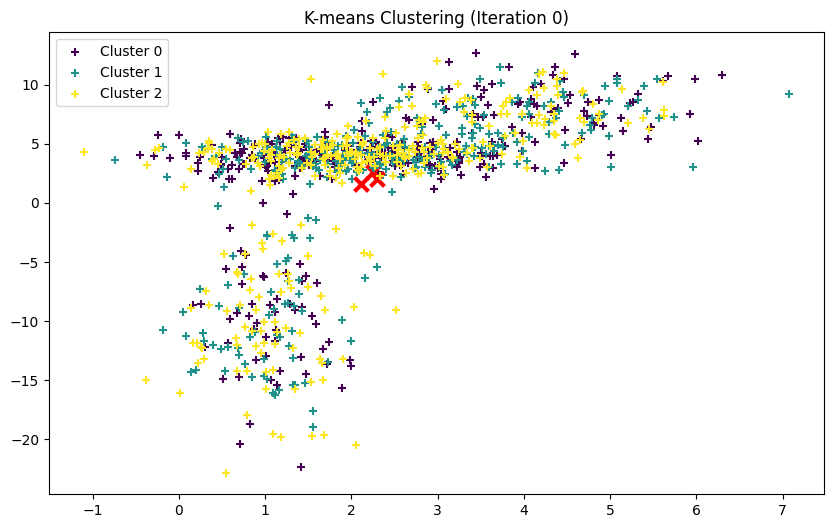

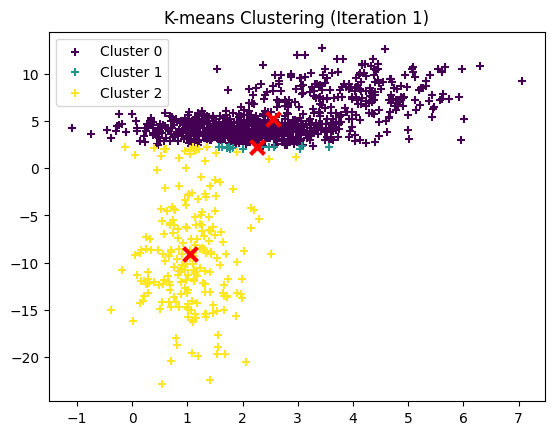

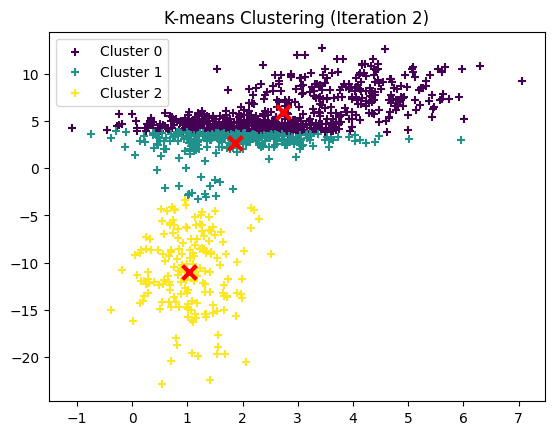

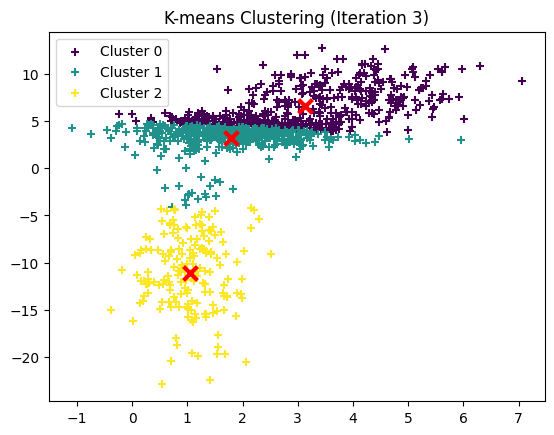

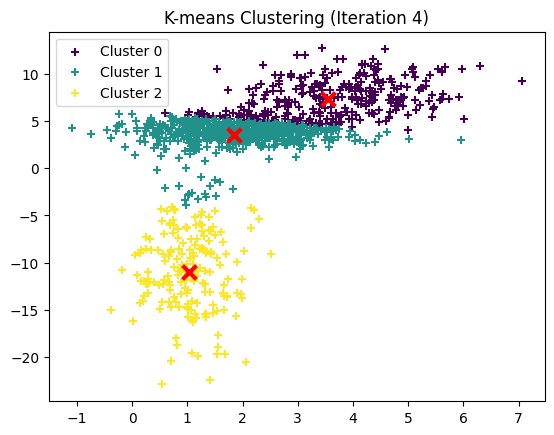

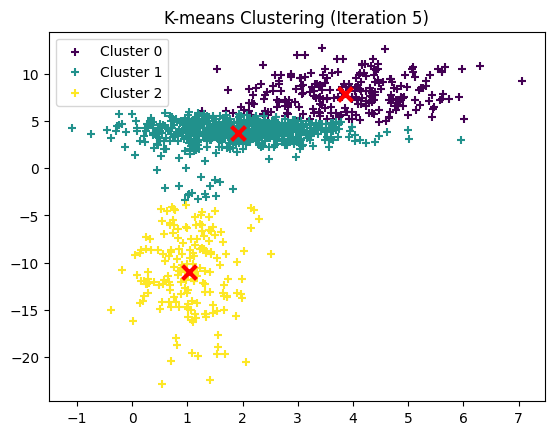

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def kmean_dynamic(X, K, plot_data = False):
    """
    Perform k-means algorithm to define K clusters among the data X.
    X : numpy array that contains the data, X[i, :] represents the i-th data point.
    K : number of clusters to form.
    """
    # Initialize labels randomly
    label = np.random.randint(K, size=np.shape(X)[0])
    weight = []

    # Initialize plot
    if plot_data:
        fig, ax = plt.subplots(figsize=(10, 6))
        colors = plt.cm.get_cmap('viridis', K)

    # Iterations
    stationnary = False
    iteration = 0

    while not stationnary:
        stationnary = True
        mean = compute_mean(X, K, label)


        if plot_data:
            # Plot the current state of clusters and centroids
            for k in range(K):
                cluster_points = X[label == k]
                plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors(k), marker='+', label=f'Cluster {k}')
                plt.scatter(mean[k, 0], mean[k, 1], color='red', marker='x', s=100, linewidths=3)

            plt.title(f'K-means Clustering (Iteration {iteration})')
            plt.legend()
            plt.draw()  # Force a redraw
            plt.pause(0.5)  # Pause to visualize the current state
            plt.clf()

        # Update labels
        for i in range(np.shape(X)[0]):
            # Find the nearest mean point
            neighboor, distance = -1, np.infty
            for k in range(K):
                if np.linalg.norm(X[i, :] - mean[k, :]) < distance:
                    neighboor = k
                    distance = np.linalg.norm(X[i, :] - mean[k, :])

            # Update label if necessary
            if label[i] != neighboor:
                stationnary = False
            label[i] = neighboor

        # Store WCSS
        weight.append(WCSS(X, K, label))
        iteration += 1

    if plot_data:
        plt.show()
    return label, weight

K = 3
kmean_dynamic(X, K, plot_data=True)

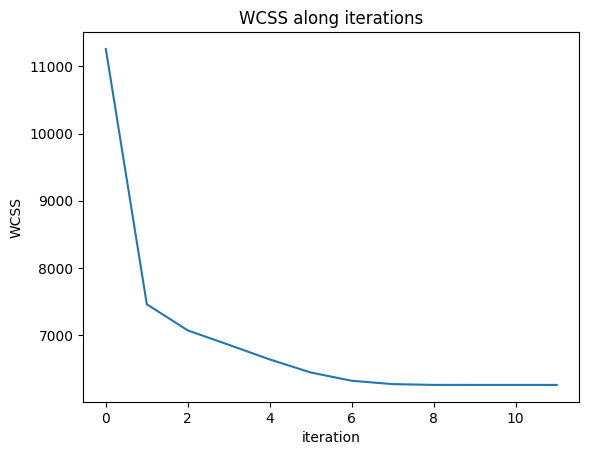

In [ ]:
label, weight = kmean_dynamic(X, K)
plt.figure()
plt.plot(weight)
plt.xlabel("iteration")
plt.ylabel("WCSS")
plt.title("WCSS along iterations")
plt.show()